# Lagrangian and Eulerian demonstration on ECCO

`seaduck` Lagrangian particle demonstration. This version uses the ECCO MITgcm velocity field data available on SciServer.

authors: Wenrui Jiang, Tom Haine Feb '23

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import seaduck as sd

### The ECCO MITgcm run is a low-resolution global state estimate, available on SciServer. The simulation is opened using the OceanSpy package.

Choose between the monthly-mean data ('ECCO') or the daily-mean data ('daily_ecco').

### See: https://dev-poseidon-ocean.pantheonsite.io/products/datasets/.

In [2]:
# ecco = ospy.open_oceandataset.from_catalog("ECCO")
# ecco = ospy.open_oceandataset.from_catalog('daily_ecco')
ecco = sd.utils.get_dataset("ecco")
ecco = sd.utils.process_ecco(ecco)

In [16]:
ecco

<xarray.Dataset>
Dimensions:    (face: 13, X: 90, Y: 90, time_midp: 2, time: 3, Z: 50, Yp1: 90, Zl: 50, Xp1: 90, Zp1: 51, Zu: 50, nv: 2)
Coordinates: (12/42)
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * X          (X) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * Y          (Y) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * time_midp  (time_midp) datetime64[ns] 1992-01-31T12:00:00 1992-03-01T12:0...
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 1992-03-16T12:00:00
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
    ...         ...
    rA         (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (face, Yp1, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (face, Y, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (face, Yp1, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(3, 2), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    UVELMASS1  (Z, face, Y, Xp1) float16 dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    VVELMASS1  (Z, face, Yp1, X) float16 dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    WVELMASS1  (Zl, face, Y, X) float16 dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    UVELMASS   (time, Z, face, Y, Xp1) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    WVELMASS   (time, Zl, face, Y, X) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    VVELMASS   (time, Z, face, Yp1, X) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SALT       (time, Z, face, Y, X) float64 0.8641 0.5259 ... 0.09563 0.9472
    SALT_snap  (time_midp, Z, face, Y, X) float64 0.6193 0.7342 ... 0.9674
    ETAN       (time, face, Y, X) float64 0.8641 0.5259 0.9585 ... 0.1691 0.8962
    ETAN_snap  (time_midp, face, Y, X) float64 0.6193 0.7342 ... 0.3643 0.6661
Attributes: (12/16)
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    date_created:               Mon Dec 30 11:13:26 2019
    ...                         ...
    geospatial_vertical_max:    -5.0
    geospatial_vertical_min:    -5906.25
    nx:                         90
    ny:                         90
    nz:                         50
    title:                      ECCOv4 MITgcm grid information

### Initialize seaduck package. Then set the debug level.

In [3]:
sd.rcParam[
    "debug_level"
] = "very_high"  # Options are: 'high','very_high','not that high'

### Specify the parameters for the particles (number, positions, start time).

In [43]:
# Define the extend of the box
west = -19.0
east= -9.0
south = 57.0
north = 63.0
shallow = -10.0
deep = -10.0

time = "1992-02-15"

Nlon = 20  # How many along longitudinal direction?
Nlat = 20  # How many along latitudinal direction?
Ndep = 1  # How many along vertical direction?

x, y, z, t = sd.utils.easy_3d_cube(
    (east, west, Nlon),
    (south, north, Nlat),
    (shallow, deep, Ndep),
    time,
    print_total_number=True,
)

A total 400 positions defined.


In [44]:
# x,y,z,t = 
# # Change the number of particles here
# N = int(1e2)

# # Change the vertical depth of the particles here
# levels = np.array([-5])
# sqrtN = int(np.sqrt(N))

# # Change the longitude and latitude positions of the particles here
# xx = np.linspace(-19, -9, sqrtN)
# yy = np.linspace(63, 57, sqrtN)

# # Compute intermediate grid variables
# xxx, yyy = np.meshgrid(xx, yy)
# x = xxx.ravel()
# y = yyy.ravel()
# x, z = np.meshgrid(x, levels)
# y, z = np.meshgrid(y, levels)
# x = x.ravel()
# y = y.ravel()
# z = z.ravel()

# # Change the times here
# start_time = "1998-12-15"
# t = (
#     np.array([np.datetime64(start_time) for i in x]) - np.datetime64("1970-01-01")
# ) / np.timedelta64(1, "s")

#### Plot the particle positions

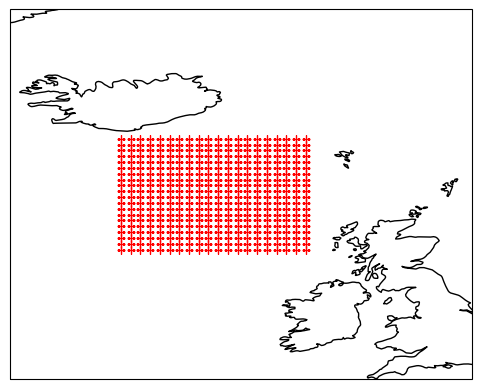

In [45]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(x, y, "r+")
ax.coastlines()
ax.set_xlim([-25, 0])
ax.set_ylim([50, 70])
plt.show()

### Let's explore the interpolation function in `seaduck`:

In [46]:
help(sd.OceInterp)

Help on function OceInterp in module seaduck.oceinterp:

OceInterp(od, varList, x, y, z, t, kernelList=None, lagrangian=False, lagrange_kwarg={}, update_stops='default', return_in_between=True, return_pt_time=True, kernel_kwarg={})
    Interp for people who just want to take a quick look.
    
    **This is the centerpiece function of the package, through which
    you can access almost all of its functionality.**.
    
    **Parameters:**
    
    + od: OceInterp.OceData object or xarray.Dataset (limited support for netCDF Dataset)
        The dataset to work on.
    + varList: str or list
        A list of variable or pair of variables.
    + kernelList: OceInterp.KnW or list of OceInterp.KnW objects
        Indicates which kernel to use for each interpolation.
    + x, y, z: numpy.ndarray
        The location of the particles, where x and y are in degrees,
        and z is in meters (deeper locations are represented by more negative values).
    + t: numpy.ndarray
        In the Eul

### Interpolate these ECCO fields onto the particle positions.

In [47]:
[s, (u, v), eta, mask] = sd.OceInterp(
    ecco, ["SALT", ("UVELMASS", "VVELMASS"), "ETAN", "maskC"], x, y, z, t
)

### Plot the interpolated salinity field.

Text(0.5, 1.0, 'Salinity (psu)')

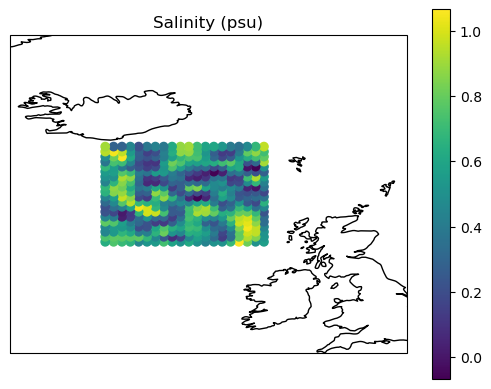

In [48]:
ax = plt.axes(projection=ccrs.PlateCarree())
c = ax.scatter(x, y, c=s)
ax.coastlines()
ax.set_xlim([-25, 0])
ax.set_ylim([50, 70])
plt.colorbar(c)
plt.title("Salinity (psu)")

### Plot the interpolated $u$ field.

Text(0.5, 1.0, 'Zonal Velocity (m/s)')

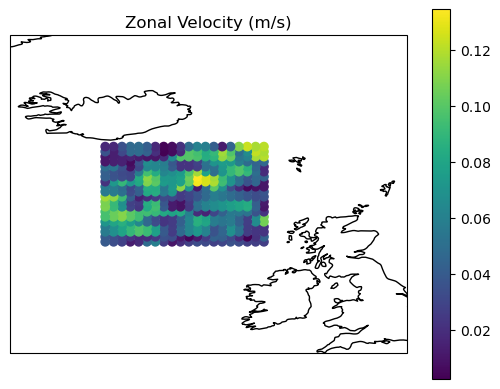

In [49]:
ax = plt.axes(projection=ccrs.PlateCarree())
c = ax.scatter(x, y, c=u)
ax.coastlines()
ax.set_xlim([-25, 0])
ax.set_ylim([50, 70])
plt.colorbar(c)
plt.title("Zonal Velocity (m/s)")

### Plot the interpolated $\\eta$ field.

Text(0.5, 1.0, 'Sea Surface Height (m)')

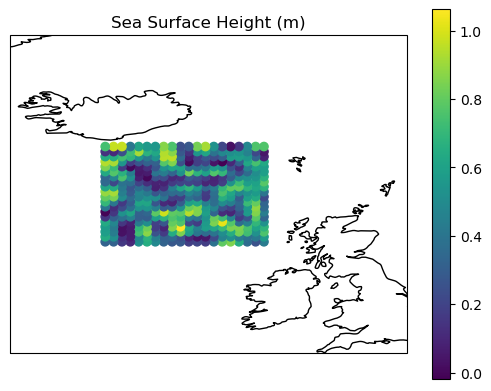

In [50]:
ax = plt.axes(projection=ccrs.PlateCarree())
c = ax.scatter(x, y, c=eta)
ax.coastlines()
ax.set_xlim([-25, 0])
ax.set_ylim([50, 70])
plt.colorbar(c)
plt.title("Sea Surface Height (m)")

### Now compute Lagrangian trajectories for these particles.

#### Define the `start_time` and `end_time`. Here the particles are integrated backwards in time.

In [51]:
start_time = "1992-01-17"
end_time = "1992-03-12"

t_bnds = np.array(
    [
        np.datetime64(start_time) - np.datetime64("1970-01-01"),
        np.datetime64(end_time) - np.datetime64("1970-01-01"),
    ]
) / np.timedelta64(1, "s")

### Perform the particle trajectory simulation.

#### Record the salinity along the particle trajectories as well as their (lat,lon) positions.

In [52]:
stops, [s, raw, lat, lon] = sd.OceInterp(
    ecco,
    ["SALT", "__particle.raw", "__particle.lat", "__particle.lon"],
    x,
    y,
    z,
    t_bnds,
    lagrangian=True,
    return_pt_time=True,
    lagrange_kwarg={"save_raw": True},
)

1992-01-31T12:00:00
0 left        
1992-03-01T12:00:00
0 left        
1992-03-12T00:00:00
0 left        


#### There are 4 output times. See also the diagnostic output from running the integration.

In [53]:
stops

(696859200.0, 699451200.0, 700358400.0)

#### The `raw` output is a vector of `OceInterp` objects with position information

In [54]:
raw

### Plot the interpolated salinity field on the final particle positions.

Text(0.5, 1.0, 'salinity map')

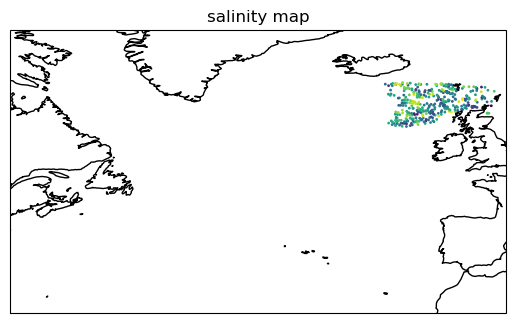

In [55]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(lon[-1], lat[-1],c = s[-1],s = 1)
ax.coastlines()
ax.set_xlim([-70, 0])
ax.set_ylim([30, 70])
plt.title("salinity map")

### There are some other `OceInterp` classes:

#### 1. Kernel object

In [56]:
KnW = sd.kernel_weight.KnW

#### Define derivative kernels for 
$\partial / \partial z$, $\partial^2 / \partial x^2$, and $\partial / \partial t$.

In [57]:
default = KnW()
dz_kernel = KnW(vkernel="dz")
dx2_kernel = KnW(
    hkernel="dx", h_order=2, inheritance=[[0, 1, 2, 3, 4, 5, 6, 7, 8]], tkernel="linear"
)
dt_kernel = KnW(tkernel="dt")

#### Apply the kernels to the ECCO fields:

In [58]:
[dsdz, (d2udx2, dvdt)] = sd.OceInterp(
    ecco,
    {"SALT": dz_kernel, ("UVELMASS", "VVELMASS"): (dx2_kernel, dt_kernel)},
    x,
    y,
    z,
    t,
)

result will be in the order of ['SALT', ('UVELMASS', 'VVELMASS')]


### Plot one of the differentiated fields on the initial particle positions.

Text(0.5, 1.0, 'Second Derivative of the Zonal Velocity (m/s per grid scale squared)')

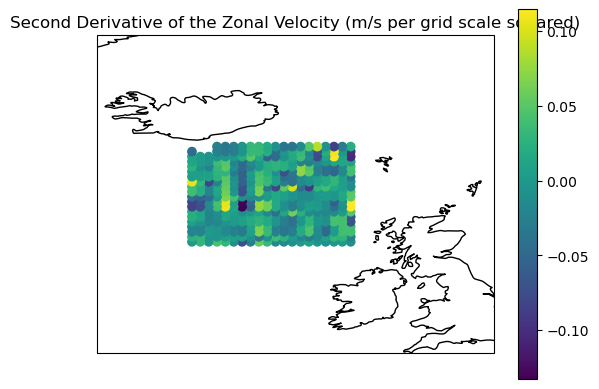

In [59]:
ax = plt.axes(projection=ccrs.PlateCarree())
c = ax.scatter(x, y, c=d2udx2)
ax.coastlines()
ax.set_xlim([-25, 0])
ax.set_ylim([50, 70])
plt.colorbar(c)
plt.title("Second Derivative of the Zonal Velocity (m/s per grid scale squared)")